In [1]:
from numpy.random import randint
import numpy as np
import sys

sys.path.append("..")
from common_functions import encode_message, decode_message

%reload_ext jupyter_black

In [2]:
n = 100
np.random.seed(seed=0)

In [3]:
# TODO: Nonce generation at the beggining is skipped

In [4]:
# Verifier and Prover generate n random bases a
a_bases = randint(2, size=n)
print("a bases:", a_bases)

# Verifier generates n random challenger-bits c
c_bits = randint(2, size=n)
print("\nc bits:", c_bits)

a bases: [0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]

c bits: [1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


/home/kevin/anaconda3/envs/qiskit-env/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


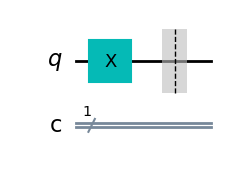

In [5]:
# Encode c in a
message = encode_message(c_bits, a_bases, n)

# Draw the circuit bit 0
message[0].draw(output="mpl")

In [6]:
# Prover decodes the qubits in the bases a and store them as c
c_prover = decode_message(message, a_bases, n)
print("\nc measured by P:", c_prover)


c measured by P: [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]


In [7]:
# Prover re-encode the qubits in the bases a and sends them to the Verifier
message_back = encode_message(c_prover, a_bases, n)

# Verifier decodes the message in the bases a and store them as c'
c_verifier = decode_message(message_back, a_bases, n)

# Verifier compares c and c'
print(c_prover == c_verifier)

True


In [8]:
# TODO: Last step is a MAC check
# TODO: CURRENTLY I SEND ALL OF THE BITS. THEY NEED TO BE SEND ONE BY ONE. SO I NEED LOOP THROUGH IT